In [33]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler, PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor

In [3]:
df = pd.read_csv('insurance.csv')
print(df.head())

   age     sex     bmi  children smoker     region      charges
0   19  female  27.900         0    yes  southwest  16884.92400
1   18    male  33.770         1     no  southeast   1725.55230
2   28    male  33.000         3     no  southeast   4449.46200
3   33    male  22.705         0     no  northwest  21984.47061
4   32    male  28.880         0     no  northwest   3866.85520


In [34]:
#handle missing data
missing_values_count = df.isna().sum()

print(missing_values_count)


age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64


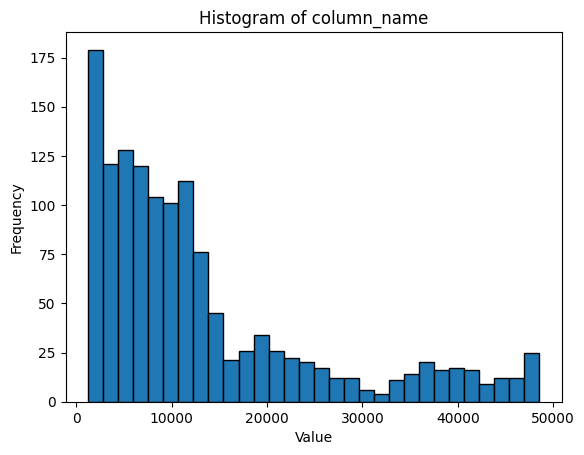

In [7]:
# handling outliers using histogram or boxplot method
for column in df.columns:
    data = df[column]

# Handling outliers by capping them at the 1st and 99th percentiles
lower_bound = np.percentile(data, 1)
upper_bound = np.percentile(data, 99)
data = np.clip(data, lower_bound, upper_bound)

# Plotting the histogram
plt.hist(data, bins=30, edgecolor='black')
plt.title('Histogram of column_name')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.show()

In [22]:
#Convert categorical features using either get_dummies or map encoding.
df_encoded = pd.get_dummies(df, drop_first=True)

print(df_encoded.head())

   age     bmi  children      charges  sex_male  smoker_yes  region_northwest  \
0   19  27.900         0  16884.92400     False        True             False   
1   18  33.770         1   1725.55230      True       False             False   
2   28  33.000         3   4449.46200      True       False             False   
3   33  22.705         0  21984.47061      True       False              True   
4   32  28.880         0   3866.85520      True       False              True   

   region_southeast  region_southwest  
0             False              True  
1              True             False  
2              True             False  
3             False             False  
4             False             False  


In [26]:
X = df_encoded.drop('charges', axis=1)
y = df_encoded['charges']

In [27]:
#Scale the data using min-max scaler: (X-X.min())/(X.max()-X.min())
scaler = MinMaxScaler()
X_scaled = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)

print(df_scaled.head())

        age       bmi  children   charges  sex_male  smoker_yes  \
0  0.021739  0.321227       0.0  0.251611       0.0         1.0   
1  0.000000  0.479150       0.2  0.009636       1.0         0.0   
2  0.217391  0.458434       0.6  0.053115       1.0         0.0   
3  0.326087  0.181464       0.0  0.333010       1.0         0.0   
4  0.304348  0.347592       0.0  0.043816       1.0         0.0   

   region_northwest  region_southeast  region_southwest  
0               0.0               0.0               1.0  
1               0.0               1.0               0.0  
2               0.0               1.0               0.0  
3               1.0               0.0               0.0  
4               1.0               0.0               0.0  


In [28]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [29]:
#linear regression and display training and testing errors
model = LinearRegression()
model.fit(X_train, y_train)
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

#Display training results 
print("Training Results:")
print(f"Mean Squared Error: {mean_squared_error(y_train, y_train_pred)}")
print(f"R^2 Score: {r2_score(y_train, y_train_pred)}")

# Display testing results
print("\nTesting Results:")
print(f"Mean Squared Error: {mean_squared_error(y_test, y_test_pred)}")
print(f"R^2 Score: {r2_score(y_test, y_test_pred)}")


Training Results:
Mean Squared Error: 37277681.70201867
R^2 Score: 0.7417255854683333

Testing Results:
Mean Squared Error: 33596915.85136148
R^2 Score: 0.7835929767120722


In [32]:
#polynomial regression and display training and testing errors

poly = PolynomialFeatures(degree=2)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

# Initialize and train the polynomial regression model
model = LinearRegression()
model.fit(X_train_poly, y_train)

# Make predictions on the training set
y_train_pred = model.predict(X_train_poly)

# Make predictions on the testing set
y_test_pred = model.predict(X_test_poly)

# Display training results
print("Training Results:")
print(f"Mean Squared Error: {mean_squared_error(y_train, y_train_pred)}")
print(f"R^2 Score: {r2_score(y_train, y_train_pred)}")

# Display testing results
print("\nTesting Results:")
print(f"Mean Squared Error: {mean_squared_error(y_test, y_test_pred)}")
print(f"R^2 Score: {r2_score(y_test, y_test_pred)}")


Training Results:
Mean Squared Error: 22831078.676334273
R^2 Score: 0.8418173231535121

Testing Results:
Mean Squared Error: 20712805.987918362
R^2 Score: 0.8665830903164841


In [35]:
#random forest regression and display training and testing errors
model = RandomForestRegressor(random_state=42)
model.fit(X_train, y_train)

# Make predictions on the training set
y_train_pred = model.predict(X_train)

# Make predictions on the testing set
y_test_pred = model.predict(X_test)

# Display training results
print("Training Results:")
print(f"Mean Squared Error: {mean_squared_error(y_train, y_train_pred)}")
print(f"R^2 Score: {r2_score(y_train, y_train_pred)}")

# Display testing results
print("\nTesting Results:")
print(f"Mean Squared Error: {mean_squared_error(y_test, y_test_pred)}")
print(f"R^2 Score: {r2_score(y_test, y_test_pred)}")

Training Results:
Mean Squared Error: 3744475.659621949
R^2 Score: 0.9740568025005545

Testing Results:
Mean Squared Error: 20996839.519771587
R^2 Score: 0.8647535518131806
